## PAIR PROGRAMMING - ESTADÍSTICA Y VISUALIZACIÓN - REPASO

Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo. El objetivo de este pair programming es:

1. Hacer una exploración inicial del dataframe.

   - Cuántas filas tiene?
   -  ¿Cuántas nulos tiene?
   -  ¿Y duplicados?
   -  ¿Qué tipo de datos tenemos en el dataframe?
   -   etc.
  
  
2. Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.
   
3. Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from scipy.stats import skew


In [4]:


df_exams = pd.read_csv('datos/exams.csv')

In [5]:
df_exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [6]:
#numero de filas

df_exams.shape[0]

1000

In [7]:
df_exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df_exams['lunch'].isnull().sum()

0

In [9]:
df_exams.duplicated().sum()

0

In [10]:
df_exams.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
df_exams.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [12]:
df_exams.median()

/tmp/ipykernel_10336/161918488.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_exams.median()


math score       68.0
reading score    70.5
writing score    70.0
dtype: float64


Relaciona el nivel educativo de los padres con el curso preparatorio de acceso a la universidad. 


In [13]:
#tabla de contingencia

df_exams_crosstab = pd.crosstab(df_exams['parental level of education'], df_exams['test preparation course'], normalize = True) * 100
df_exams_crosstab

test preparation course,completed,none
parental level of education,,
associate's degree,7.2,13.2
bachelor's degree,4.0,6.5
high school,7.2,14.3
master's degree,2.1,5.4
some college,7.8,14.6
some high school,6.1,11.6


In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df_exams_crosstab,
            cmap = "violet", # para cambiar el color
           annot = True); # para sacar el valor de la correlación

TypeError: 'module' object is not callable

Sin saber los específicos del curso de preparación analizamos:

Lo primero, asumimos que las familias con un mayor nivel de estudios transmiten estos valores de estudio a sus hijos.

Asumimos también, por el bien del ejercicio, que el curso preparatorio está orientado al alumnado que necesita más refuerzo, por ello no nos sorprendería que lo cursaran más alumnos de familias con un nivel de estudios más bajo



In [34]:
df_exams_crosstab.columns

Index(['completed', 'none'], dtype='object', name='test preparation course')

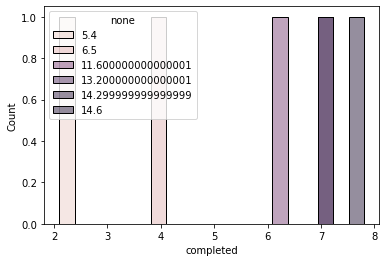

In [39]:
fig = sns.histplot(x='completed', data = df_exams_crosstab, hue = 'none', bins = 20) 
#no se puede hacer tal cual está la tabla de contingencia, habría que trasponer y sería bastante más complicado